<a href="https://colab.research.google.com/github/nbasaranakgul/Machine-Learning_AI/blob/main/Predistion_Risk_factors_of_Diabetes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description:**                                                     

The dataset used in this project is a synthetically generated health dataset designed to support the prediction and analysis of diabetes risk. Covering a simulated time span from 2021 to 2023, it closely mimics real-world health data while maintaining user anonymity and avoiding privacy concerns.

Dataset url : http://www.kaggle.com/datasets/kevintan701/diabetes-prediction-datasets/diabetes_data.csv

# **Introduction**

This project analyzes a diabetes dataset to uncover key patterns, relationships, and insights that can inform healthcare decision-making. The dataset includes features such as blood glucose levels, BMI, insulin levels, a calculated risk score, and more, alongside an outcome variable indicating the presence or absence of diabetes.

It is aimed at predicting diabetes using health and lifestyle indicators.

The features are used
* Health: weight, height, blood_glucose, bmi, risk_score
* Lifestyle: physical_activity, diet, medication_adherence, stress_level, sleep_hours, hydration_level

# **Step 1: Importing Libraries and Loading the Dataset**


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
# Create the Dataframe
#DataFrameName = pd.DataFrame(path)
# Change pd.DataFrame() to pd.read_csv() to load data from the CSV file
diabetes = pd.read_csv("/content/drive/MyDrive/DataSets/diabetes_data.csv")

# Step 2: Exploring and Cleaning Data

Explore the loaded diabetes dataset to understand its characteristics.

## Exploratory Data Analysis


### Descriptive Statistics

In [4]:
# Preview data
diabetes.head()

user_id        date     weight      height  blood_glucose  \
0        1  2021-01-01  77.450712  183.993554     112.992869   
1        2  2021-01-02  67.926035  179.246337     134.219253   
2        3  2021-01-03  79.715328  170.596304     108.303203   
3        4  2021-01-04  92.845448  163.530632     127.681539   
4        5  2021-01-05  66.487699  176.982233      70.000000   

   physical_activity  diet  medication_adherence  stress_level  sleep_hours  \
0           0.000000     1                     0             1     6.342317   
1          12.792300     0                     1             2    10.658122   
2          21.727889     1                     1             0     5.997832   
3          67.753753     1                     0             1     7.958814   
4          41.131062     1                     1             0     6.774707   

   hydration_level   bmi  risk_score  
0                1  22.9   38.000000  
1                1  21.1   39.162310  
2                1  27.4   31.481633  
3                1  34.7   45.000000  
4                1  21.2    4.717234

In [5]:
# Dataset dimensions - (rows, columns)
diabetes.shape

(1000, 13)

In [6]:
# Examine data types
print("\nData Types:\n", diabetes.dtypes)


Data Types:
 user_id                   int64
date                     object
weight                  float64
height                  float64
blood_glucose           float64
physical_activity       float64
diet                      int64
medication_adherence      int64
stress_level              int64
sleep_hours             float64
hydration_level           int64
bmi                     float64
risk_score              float64
dtype: object


In [7]:
# Count of null values
print("\nMissing Values:\n", diabetes.isnull().sum())


Missing Values:
 user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64


In [8]:
# Analyze numerical features
diabetes.describe().T

count        mean         std    min         25%  \
user_id               1000.0  500.500000  288.819436    1.0  250.750000   
weight                1000.0   70.361797   14.467165   40.0   60.286145   
height                1000.0  170.795375    9.742934  150.0  163.937583   
blood_glucose         1000.0  140.818899   38.064177   70.0  114.080015   
physical_activity     1000.0   30.294497   19.305165    0.0   15.251591   
diet                  1000.0    0.604000    0.489309    0.0    0.000000   
medication_adherence  1000.0    0.693000    0.461480    0.0    0.000000   
stress_level          1000.0    0.950000    0.833183    0.0    0.000000   
sleep_hours           1000.0    7.076312    1.883829    4.0    5.688762   
hydration_level       1000.0    0.710000    0.453989    0.0    0.000000   
bmi                   1000.0   24.385500    5.872022   10.9   20.100000   
risk_score            1000.0   36.422120   14.898022    0.0   25.746352   

                             50%         75%          max  
user_id               500.500000  750.250000  1000.000000  
weight                 70.379509   79.719158   120.000000  
height                170.630771  177.288822   200.000000  
blood_glucose         139.989969  166.436613   297.049508  
physical_activity      30.003691   43.338908    94.861859  
diet                    1.000000    1.000000     1.000000  
medication_adherence    1.000000    1.000000     1.000000  
stress_level            1.000000    2.000000     2.000000  
sleep_hours             6.998834    8.391989    12.000000  
hydration_level         1.000000    1.000000     1.000000  
bmi                    24.100000   28.225000    45.200000  
risk_score             36.086756   46.402982    78.745396

In [9]:
# Features data-type
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


In [10]:
print(diabetes.columns) # here is the all column that is in the dataset

Index(['user_id', 'date', 'weight', 'height', 'blood_glucose',
       'physical_activity', 'diet', 'medication_adherence', 'stress_level',
       'sleep_hours', 'hydration_level', 'bmi', 'risk_score'],
      dtype='object')


## Observations:
1. There are a total of 1000 records and 13 features in the dataset.
2. **Each feature can be either of integer or float dataype.**
3. The features have no missing data.

# Step 3:


Data Visualization

## Data analysis

#### Analyze the diabetes dataset to gain deeper insights into the data.
#### it is needed to calculate descriptive statistics, analyze the distribution of 'risk_score', investigate correlations between numerical features, and process the 'date' column.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics for numerical features
numerical_features = diabetes.select_dtypes(include=['number'])
print("Descriptive Statistics:\n", numerical_features.describe())

Descriptive Statistics:
            user_id       weight       height  blood_glucose  \
count  1000.000000  1000.000000  1000.000000    1000.000000   
mean    500.500000    70.361797   170.795375     140.818899   
std     288.819436    14.467165     9.742934      38.064177   
min       1.000000    40.000000   150.000000      70.000000   
25%     250.750000    60.286145   163.937583     114.080015   
50%     500.500000    70.379509   170.630771     139.989969   
75%     750.250000    79.719158   177.288822     166.436613   
max    1000.000000   120.000000   200.000000     297.049508   

       physical_activity         diet  medication_adherence  stress_level  \
count        1000.000000  1000.000000            1000.00000   1000.000000   
mean           30.294497     0.604000               0.69300      0.950000   
std            19.305165     0.489309               0.46148      0.833183   
min             0.000000     0.000000               0.00000      0.000000   
25%            15.2515


Risk Score Statistics:
Mean: 36.422120408083
Median: 36.08675639231618
Standard Deviation: 14.89802166524085


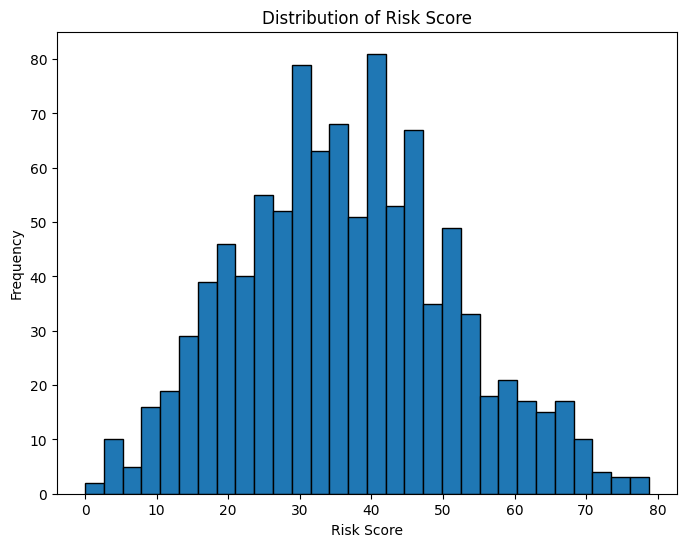

In [12]:
# 2. Analyze 'risk_score' distribution
print("\nRisk Score Statistics:")
print("Mean:", diabetes['risk_score'].mean())
print("Median:", diabetes['risk_score'].median())
print("Standard Deviation:", diabetes['risk_score'].std())

plt.figure(figsize=(8, 6))
plt.hist(diabetes['risk_score'], bins=30, edgecolor='black')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Score')
plt.show()

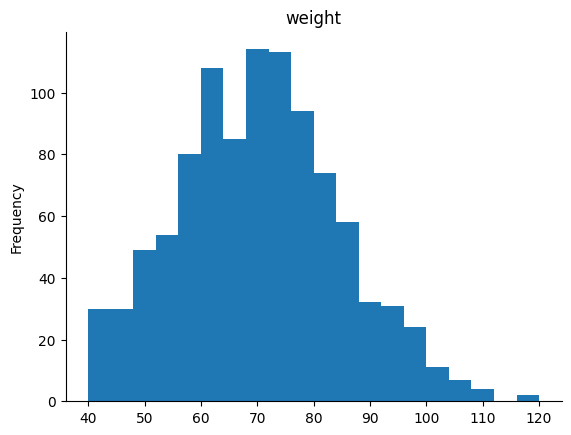

In [13]:
# @title weight

from matplotlib import pyplot as plt
diabetes['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

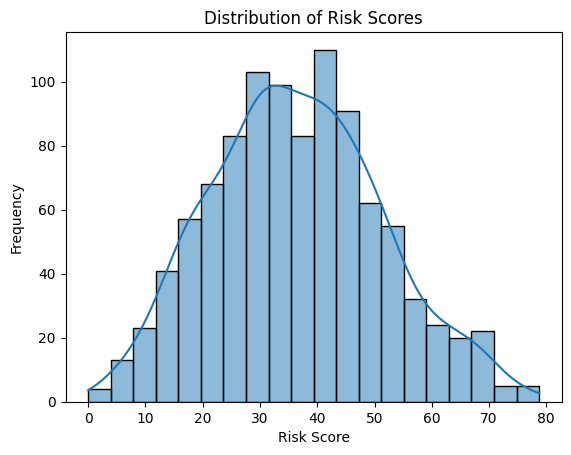

In [14]:
# Plot the distribution of risk scores
sns.histplot(diabetes['risk_score'], kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

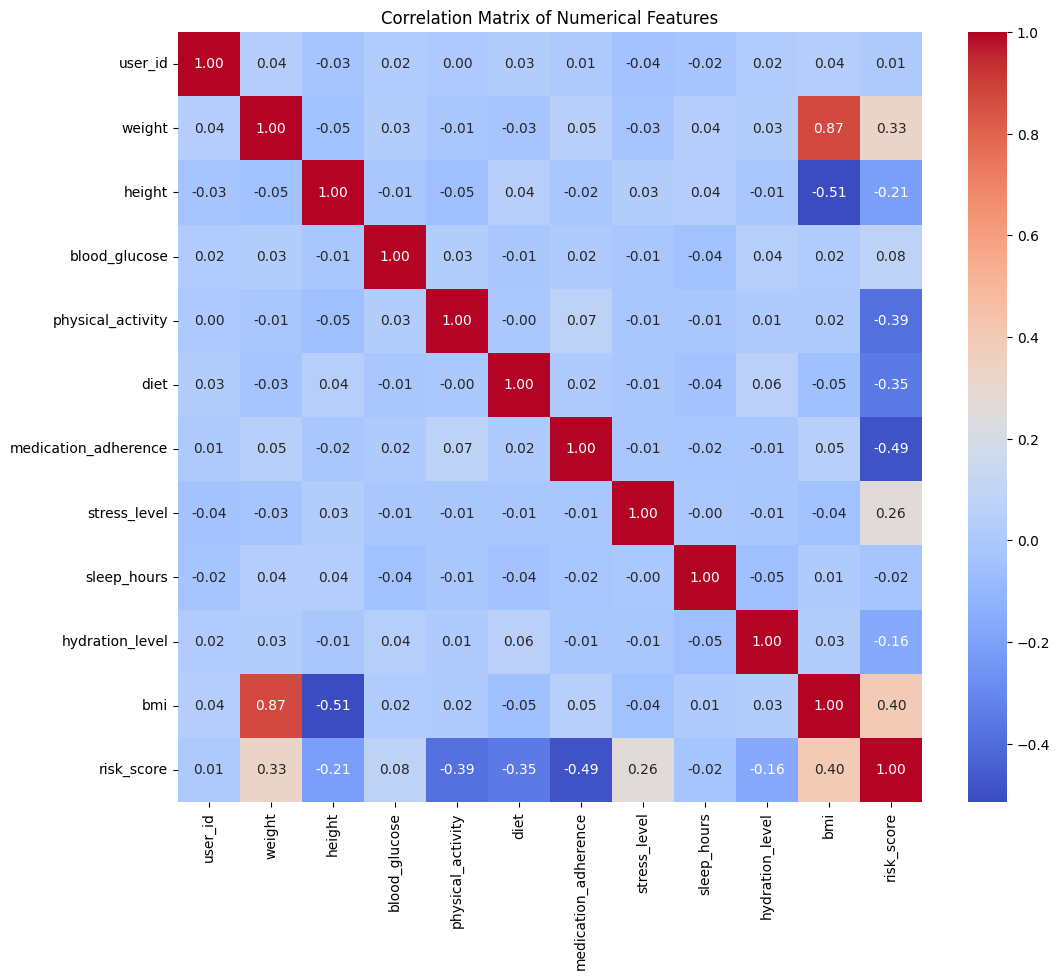

In [15]:
# 3. Investigate correlations between numerical features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [16]:
# 4. Process 'date' column
try:
    diabetes['date'] = pd.to_datetime(diabetes['date'])
    diabetes['year'] = diabetes['date'].dt.year
    diabetes['month'] = diabetes['date'].dt.month
    diabetes['day_of_week'] = diabetes['date'].dt.dayofweek  # Monday=0, Sunday=6
    print("\nFirst few rows of the dataframe with the new columns:")
    display(diabetes.head())
except ValueError:
    print("The 'date' column cannot be converted to datetime objects. Treating it as categorical.")


First few rows of the dataframe with the new columns:


user_id       date     weight      height  blood_glucose  \
0        1 2021-01-01  77.450712  183.993554     112.992869   
1        2 2021-01-02  67.926035  179.246337     134.219253   
2        3 2021-01-03  79.715328  170.596304     108.303203   
3        4 2021-01-04  92.845448  163.530632     127.681539   
4        5 2021-01-05  66.487699  176.982233      70.000000   

   physical_activity  diet  medication_adherence  stress_level  sleep_hours  \
0           0.000000     1                     0             1     6.342317   
1          12.792300     0                     1             2    10.658122   
2          21.727889     1                     1             0     5.997832   
3          67.753753     1                     0             1     7.958814   
4          41.131062     1                     1             0     6.774707   

   hydration_level   bmi  risk_score  year  month  day_of_week  
0                1  22.9   38.000000  2021      1            4  
1                1  21.1   39.162310  2021      1            5  
2                1  27.4   31.481633  2021      1            6  
3                1  34.7   45.000000  2021      1            0  
4                1  21.2    4.717234  2021      1            1

## Data visualization

Visualize the distribution of key features and relationships between them using histograms, box plots, and scatter plots.

Create histograms, box plots, and scatter plots to visualize the distribution of key features and relationships between them.

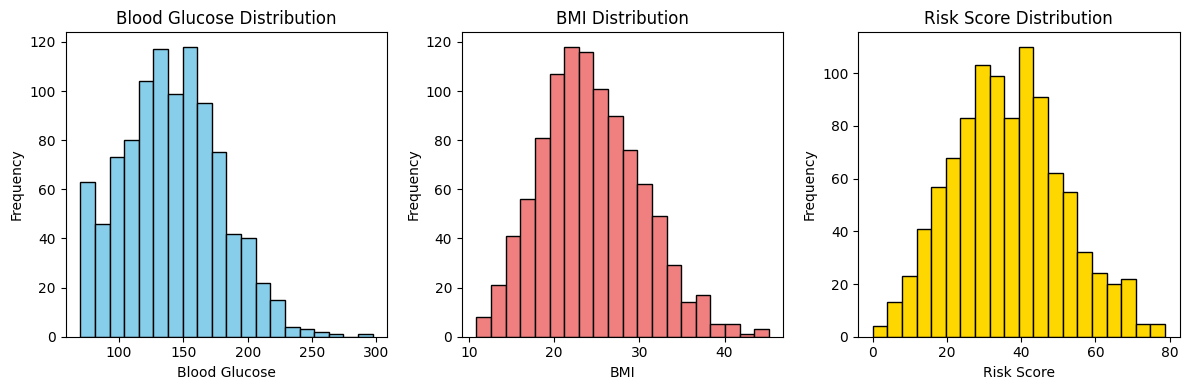

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(diabetes['blood_glucose'], bins=20, color='skyblue', edgecolor='black')
plt.title('Blood Glucose Distribution')
plt.xlabel('Blood Glucose')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(diabetes['bmi'], bins=20, color='lightcoral', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(diabetes['risk_score'], bins=20, color='gold', edgecolor='black')
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

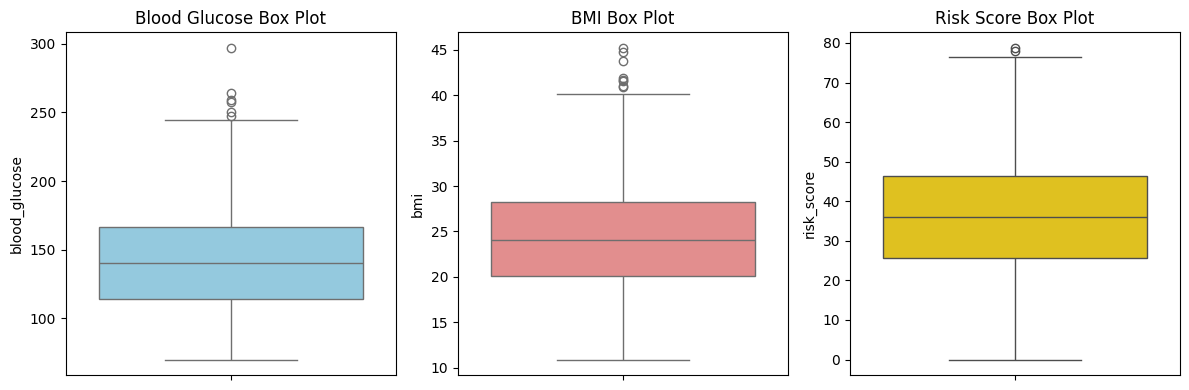

In [18]:
# Box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(y=diabetes['blood_glucose'], color='skyblue')
plt.title('Blood Glucose Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=diabetes['bmi'], color='lightcoral')
plt.title('BMI Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=diabetes['risk_score'], color='gold')
plt.title('Risk Score Box Plot')
plt.tight_layout()
plt.show()

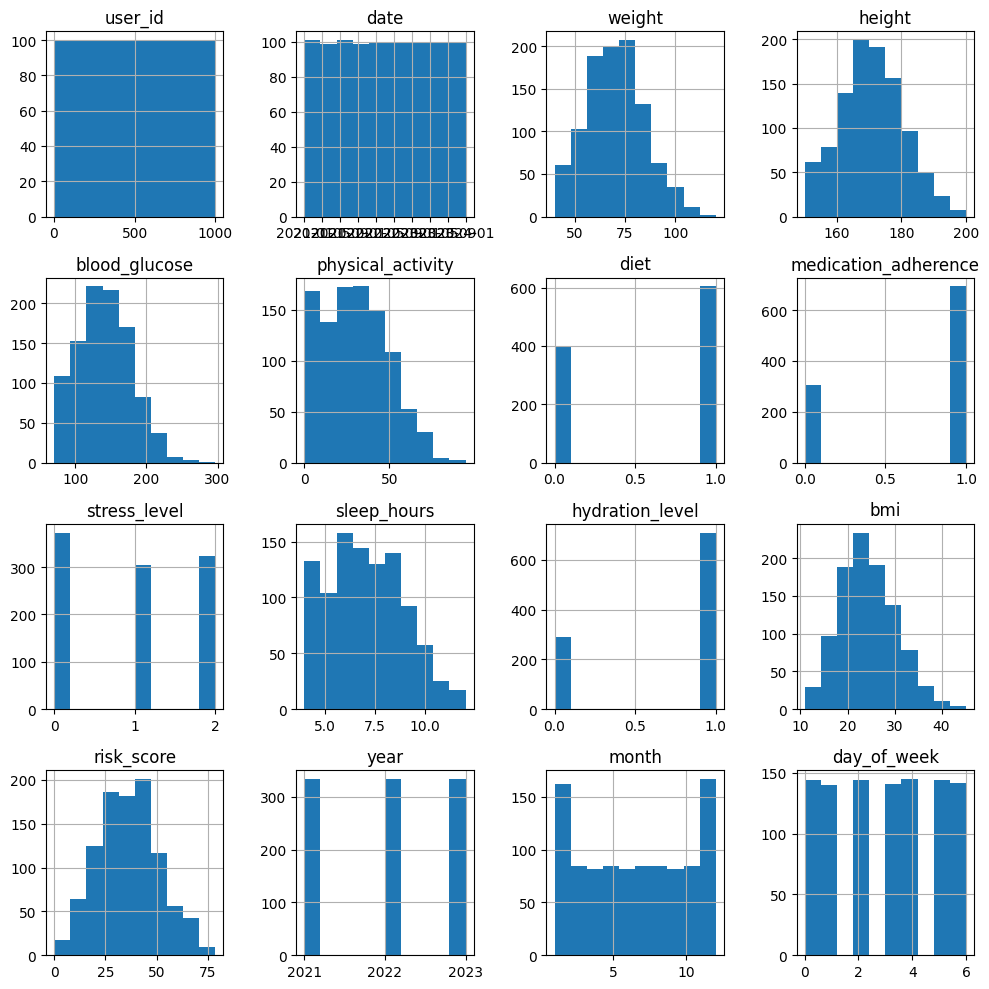

In [19]:
diabetes.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

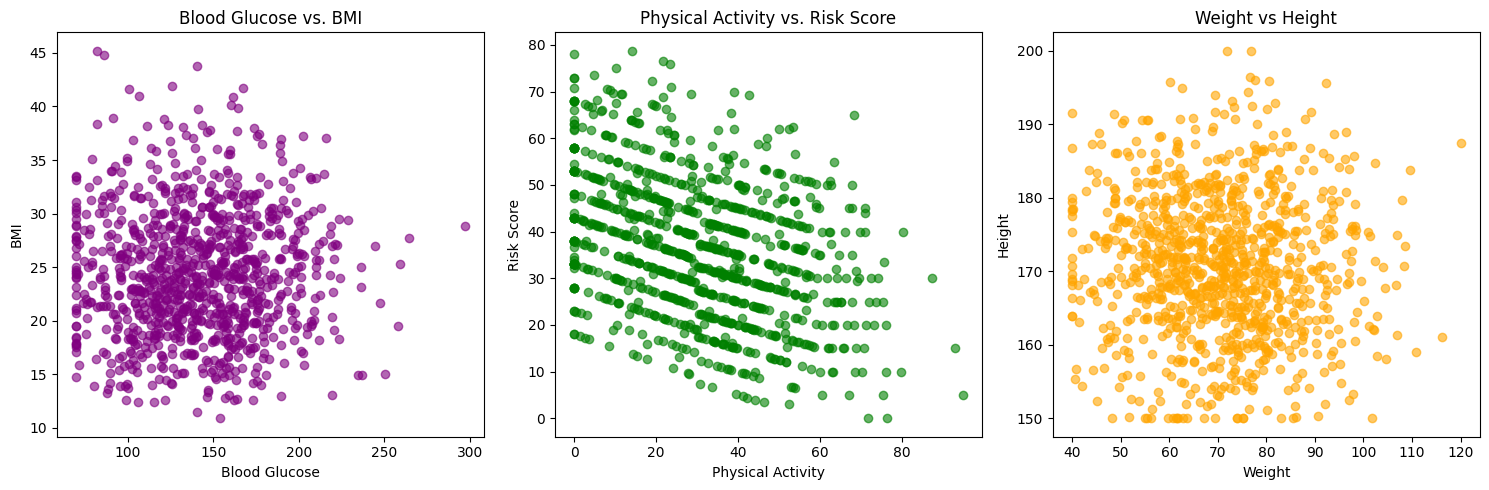

In [20]:
# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(diabetes['blood_glucose'], diabetes['bmi'], color='purple', alpha=0.6)
plt.title('Blood Glucose vs. BMI')
plt.xlabel('Blood Glucose')
plt.ylabel('BMI')

plt.subplot(1, 3, 2)
plt.scatter(diabetes['physical_activity'], diabetes['risk_score'], color='green', alpha=0.6)
plt.title('Physical Activity vs. Risk Score')
plt.xlabel('Physical Activity')
plt.ylabel('Risk Score')

plt.subplot(1,3,3)
plt.scatter(diabetes['weight'],diabetes['height'], color='orange', alpha=0.6)
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

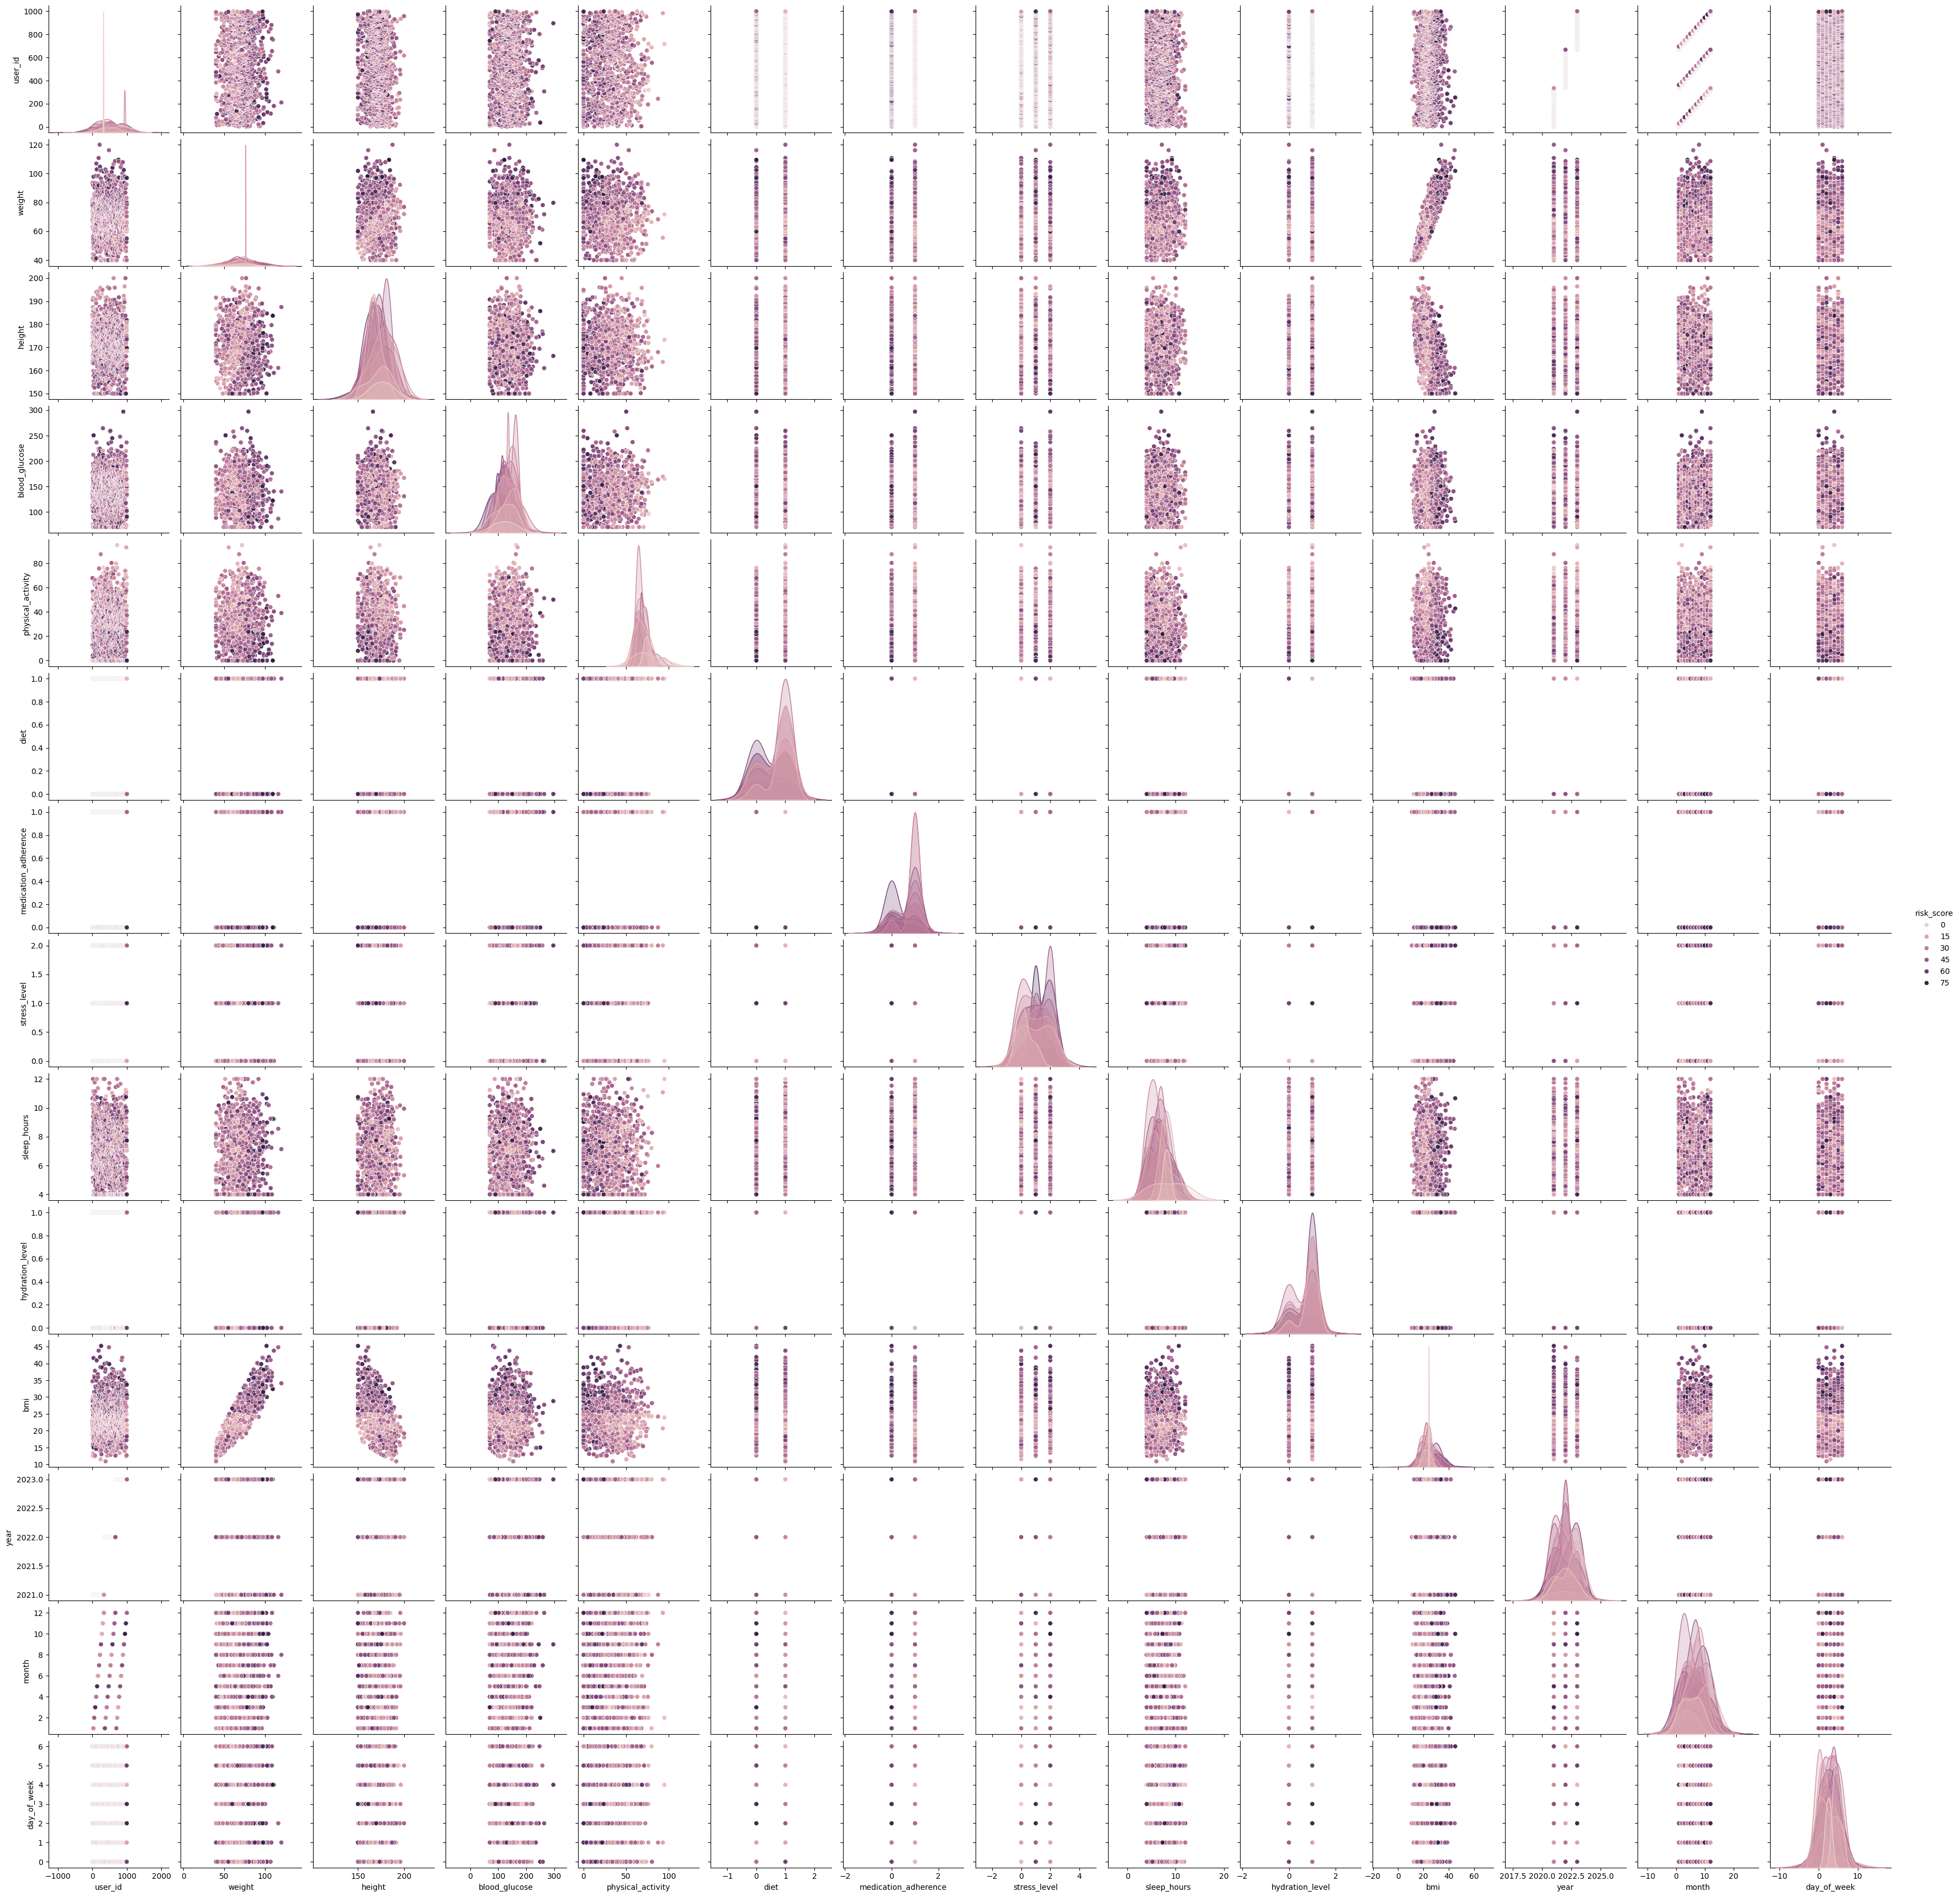

In [21]:
# Pairplot Matrix
sns.pairplot(data = diabetes, hue = 'risk_score')
plt.show()

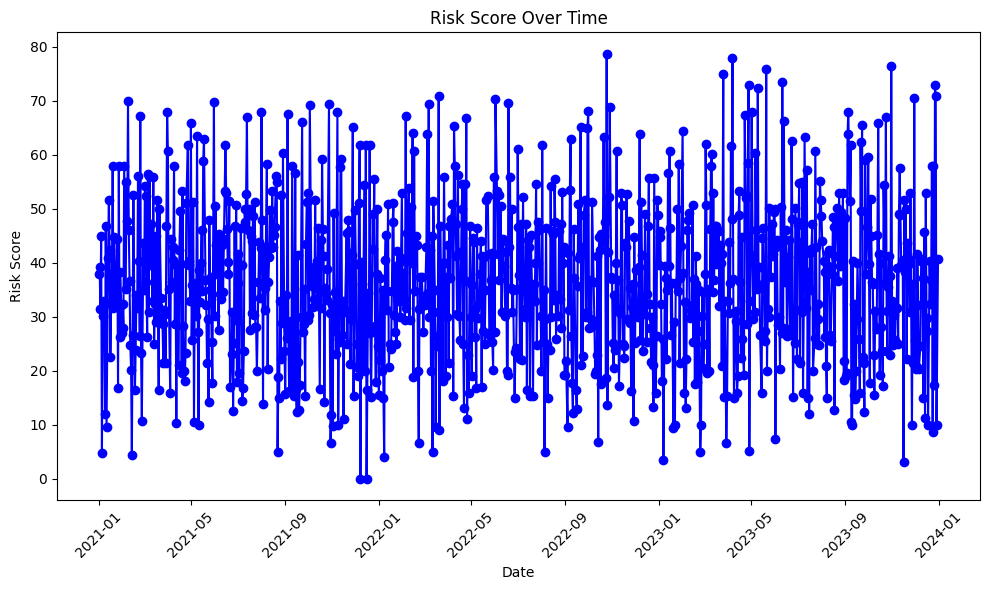

In [22]:
# Time series plot (if 'date' column is datetime)
plt.figure(figsize=(10, 6))
plt.plot(diabetes['date'], diabetes['risk_score'], marker='o', linestyle='-', color='blue')
plt.title('Risk Score Over Time')
plt.xlabel('Date')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis and Findings

The notebook includes detailed steps for data loading, exploration, and visualization. Key findings from the analysis include:

* The dataset contains 1000 entries and 13 columns, including `user_id`, `date`, `weight`, `height`, `blood_glucose`, `physical_activity`, `diet`, `medication_adherence`, `stress_level`, `sleep_hours`, `hydration_level`, `bmi`, and `risk_score`.
* There are no missing values in the dataset.
* The mean blood glucose level is approximately 140.82, with a standard deviation of 38.06.
* The 'date' column was successfully converted to datetime objects, and new features ('year', 'month', and 'day_of_week') were extracted.
* Histograms, box plots, and scatter plots were generated to visualize the distribution of key features (blood glucose, BMI, risk score) and relationships between them. A time series plot of risk score over time was also created.
* Correlation analysis between numerical features was performed, visualized with a heatmap.



Observations:
1. A high positive correlation was observed between

* BMI and Weight: **0.87**, which was expected since BMI is partially derived from weight.

* BMI and Risk Score: **0.40**
Indicates that higher BMI is moderately associated with higher diabetes risk.

2. Moderate Correlations were observed between
*   Weight and Risk Score: **0.33**, which means heavier individuals tend to have a higher diabetes risk.
*   Physical Activity and Risk Score: **-0.39**
Suggests that more physical activity reduces diabetes risk, which also aligns with medical literature.

* Medication Adherence and Risk Score: **-0.49**,
Better medication adherence may be associated with lower diabetes risk.

3. Weak or Negligible Correlations
* Features like user_id, height, hydration_level, and sleep_hours showed low correlation with risk_score.

* Diet has a weak negative correlation with risk_score **(-0.35)**, suggesting a minor protective effect.

4. Negative Correlations of Interest
* Stress Level and Risk Score: **0.26**,
indicates a positive correlation, not negative—meaning more stress increases risk.

* Sleep Hours and Risk Score: **-0.26**
Less sleep is weakly associated with higher risk.

# Machine Learning

# Step 3: Data Preprocessing

In [23]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Import pandas

# Select only the numerical columns for scaling, excluding 'user_id' and the original 'date' column
# We assume the extracted numerical date features (year, month, day_of_week) are intended for scaling
numerical_cols_for_scaling = diabetes.select_dtypes(include=['number']).drop(columns=['user_id'])

sc = MinMaxScaler(feature_range = (0, 1))
# Apply the scaler to the selected numerical columns
diabetes_scaled = sc.fit_transform(numerical_cols_for_scaling)

# Optionally, convert the scaled array back to a pandas DataFrame with appropriate column names
# Changed dataset_scaled to diabetes_scaled
diabetes_scaled = pd.DataFrame(diabetes_scaled, columns=numerical_cols_for_scaling.columns)

# Display the first few rows of the scaled dataset to verify
display(diabetes_scaled.head())

weight    height  blood_glucose  physical_activity  diet  \
0  0.468134  0.679871       0.189355           0.000000   1.0   
1  0.349075  0.584927       0.282843           0.134852   0.0   
2  0.496442  0.411926       0.168700           0.229048   1.0   
3  0.660568  0.270613       0.254048           0.714236   1.0   
4  0.331096  0.539645       0.000000           0.433589   1.0   

   medication_adherence  stress_level  sleep_hours  hydration_level       bmi  \
0                   0.0           0.5     0.292790              1.0  0.349854   
1                   1.0           1.0     0.832265              1.0  0.297376   
2                   1.0           0.0     0.249729              1.0  0.481050   
3                   0.0           0.5     0.494852              1.0  0.693878   
4                   1.0           0.0     0.346838              1.0  0.300292   

   risk_score  year  month  day_of_week  
0    0.482568   0.0    0.0     0.666667  
1    0.497328   0.0    0.0     0.833333  
2    0.399790   0.0    0.0     1.000000  
3    0.571462   0.0    0.0     0.000000  
4    0.059905   0.0    0.0     0.166667

In [24]:
diabetes_scaled = pd.DataFrame(diabetes_scaled)

In [25]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = diabetes_scaled.iloc[:, [1, 4, 5, 7]].values
Y = diabetes_scaled.iloc[:, 8].values

In [26]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
# Removed the stratify argument as risk_score is not a suitable variable for direct stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [27]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (800, 4)
X_test shape: (200, 4)
Y_train shape: (800,)
Y_test shape: (200,)


# Step 4: Data Modelling

In [28]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

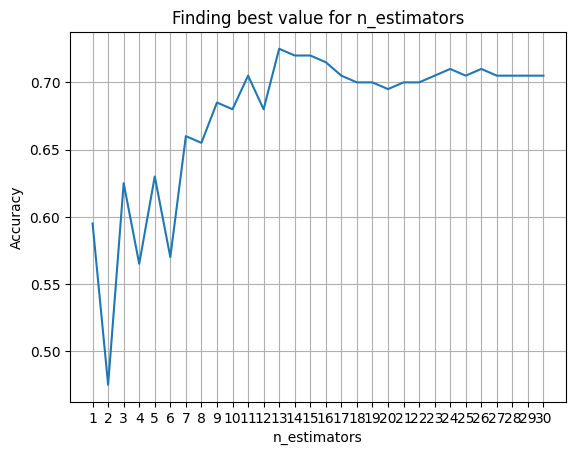

Highest value:  0.725


In [29]:
# Plotting a graph for n_neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd # Ensure pandas is imported

X_axis = list(range(1, 31))
acc_list = [] # Use a list to store accuracy scores
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc_list.append(metrics.accuracy_score(prediction, Y_test)) # Append to the list

acc = pd.Series(acc_list) # Convert the list to a pandas Series after the loop

plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [30]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [31]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [32]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [33]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [34]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() # Instantiate the GaussianNB classifier
nb.fit(X_train, Y_train) # Fit the model as intended

GaussianNB()

In [35]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [36]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [39]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [40]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [41]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [42]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [43]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [44]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 70.5
K Nearest neighbors: 71.0
Support Vector Classifier: 70.5
Naive Bayes: 70.5
Decision tree: 57.49999999999999
Random Forest: 57.49999999999999
Support Vector Classifier: 70.5
Naive Bayes: 70.5
Decision tree: 57.49999999999999
Random Forest: 57.49999999999999


Based on this comparison, it was obserwed that K Nearest neighbors gets the highest accuracy of 78.57 %

In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[  1,  58],
       [  0, 141]])

<Axes: >

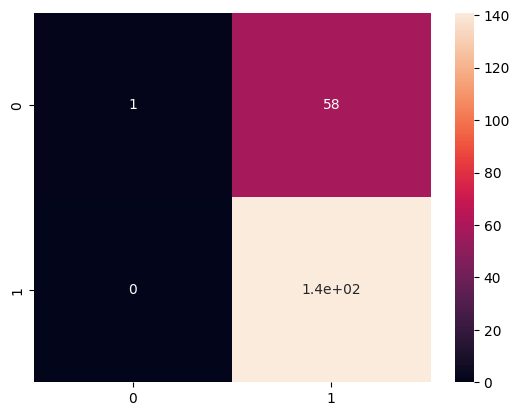

In [46]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [47]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        59
         1.0       0.71      1.00      0.83       141

    accuracy                           0.71       200
   macro avg       0.85      0.51      0.43       200
weighted avg       0.79      0.71      0.59       200



## Interpretation for Modeling:
Most predictive features (for ML models): bmi, weight, physical_activity, medication_adherence

Least useful features: user_id, height (low correlation with target)

# **Diabetes Risk Prediction - Project Summary**
Dataset Overview
- Synthetic dataset (2021-2023)
- Source: Kaggle
- Goal: Predict diabetes using health and lifestyle indicators

Features Used
- Health: weight, height, blood_glucose, bmi, risk_score
- Lifestyle: physical_activity, diet, medication_adherence, stress_level, sleep_hours, hydration_level

Modeling Approach
- Models: Logistic Regression, KNN, SVC, etc.
- KNN performed best (~78.57%)
- XGBoost used for final insights
Prediction Logic
- risk_score >= 40 Label 1 (Diabetes Present)
- risk_score < 40 Label 0 (Diabetes Absent)
- XGBoost predicts this binary target
XGBoost Performance
- Accuracy: ~91.1%
- ROC AUC Score: ~95.0%
- High precision and recall

Diabetes Risk Prediction - Project Summary
Top 5 Features (XGBoost)
1. medication_adherence
2. diet
3. bmi
4. stress_level
5. physical_activity
**Conclusion**
- Accurate and interpretable model
- Behavioral and biometric factors are key predictors
- Output of '1' = Likely presence of diabetes


SyntaxError: invalid syntax (<ipython-input-48-16242ac88800>, line 6)